# Explore here

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data = total_data[["MedInc", "Latitude", "Longitude"]]
data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [5]:
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 42)

 - Método del Codo para determinar el número óptimo de clústeres en los datos de entrenamiento X_train.

In [6]:
k_values = range(1, 11)
variance_explained = []

for k in k_values:                  # bucle sobre diferentes valores de k, que van desde 1 hasta 10 en este caso. Para cada valor de k:
    kmeans = KMeans(n_clusters=k, random_state=0)   # objeto KMeans con el número de clústeres dado por k
    kmeans.fit(X_train)                             # El modelo KMeans se ajusta utilizando los datos de entrenamiento (X_train)
    variance_explained.append(kmeans.inertia_)      # Suma de distancias al cuadrado de las muestras al centro del clúster más cercano
                                                    # que se conoce como la inercia del modelo, y se almacena en la lista variance_explained

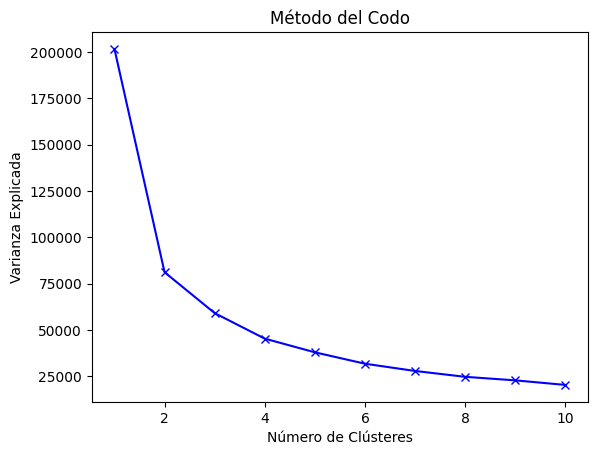

In [7]:
# Gráfico que muestra el número de clústeres en el eje x y la varianza explicada en el eje y.
# Esto nos ayuda a identificar el "codo" en la curva, que indica el número óptimo de clústeres

# Graficamos la varianza explicada vs. número de clústeres
plt.plot(k_values, variance_explained, 'bx-')
plt.xlabel('Número de Clústeres')
plt.ylabel('Varianza Explicada')
plt.title('Método del Codo')
plt.show()

In [8]:
model_k = KMeans(n_clusters = 2, n_init = "auto", random_state = 42)
model_k.fit(X_train)

KMeans(n_clusters=2, random_state=42)

In [9]:
y_train = list(model_k.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,1
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,1
2271,3.5542,36.78,-119.80,0


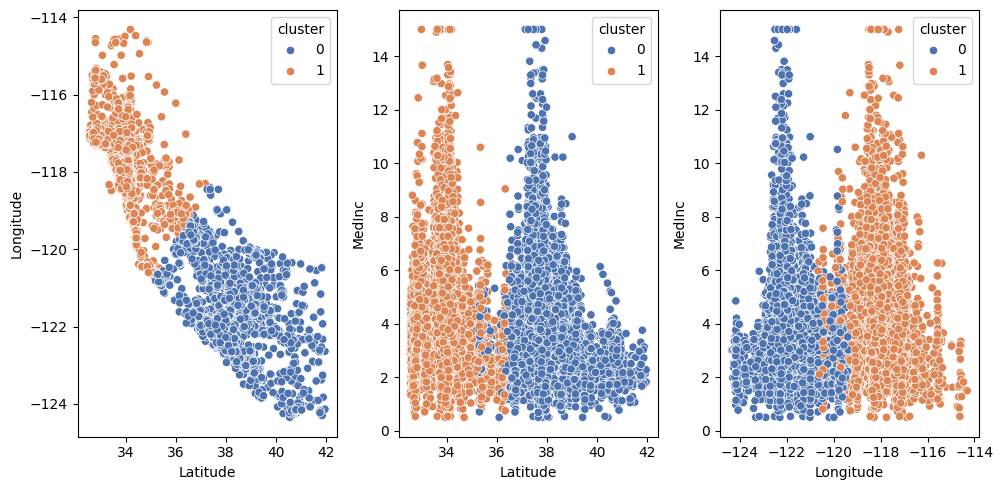

In [11]:
fig, axis = plt.subplots(1, 3, figsize = (10, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

In [12]:
y_test = list(model_k.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,1
3024,2.5313,35.14,-119.46,1
15663,3.4801,37.80,-122.44,0
20484,5.7376,34.28,-118.72,1
9814,3.7250,36.62,-121.93,0


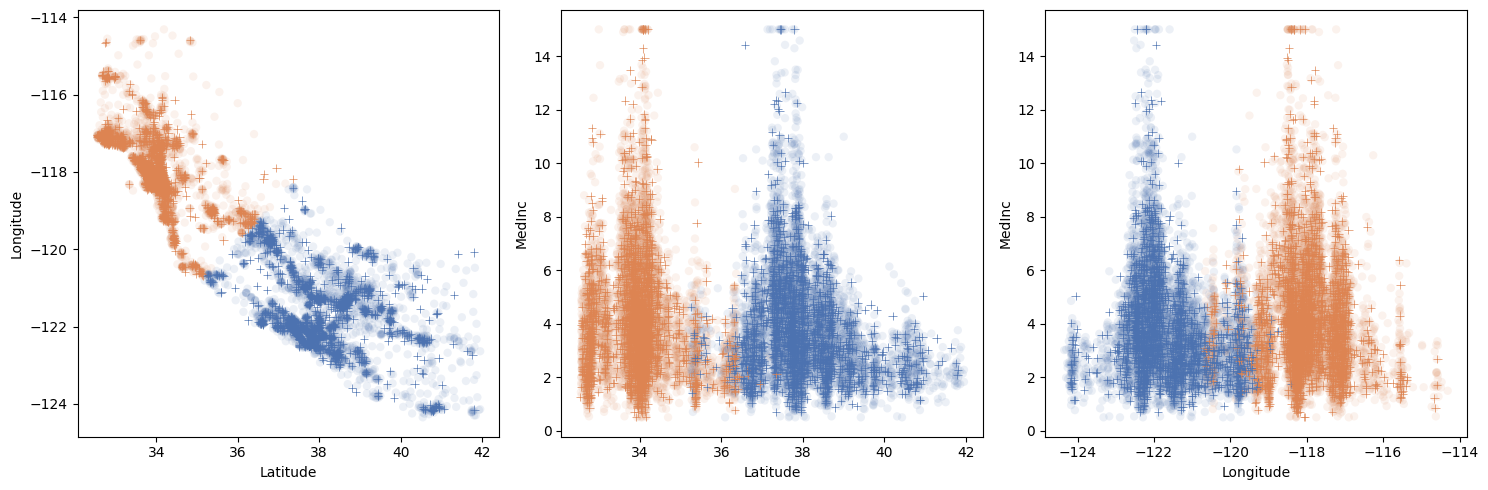

In [13]:
# gráfico de dispersión dividido en tres subgráficos para visualizar la relación entre las variables "Latitude", "Longitude" y "MedInc",
# coloreando los puntos de datos según los clústeres asignados por el modelo de agrupamiento y agregando marcadores + para los datos de prueba.

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()